# [Computer Vision] Assignment #1

본 과제의 목적은 기본적인 이미지 처리 과정을 이해하는 것을 목표로 함.

* 이미지 불러오기, 색 변환, 콘벌루션, 이미지 필터링에 대한 전반적인 내용을 다루고 있음.
* 과제는 스스로 수행하는 것을 원칙으로 함 (잘 모르겠으면 구글링해서 직접 결과물을 확인하는 것을 권장함).
* import 하는 라이브러리 외에 python 내에서 사용 가능한 라이브러리 자유롭게 사용 가능.
* 정답을 제출하는 것도 중요하지만, 해당 과정을 통해 이미지 처리, 콘벌루션, 필터링에 대한 이해를 하는 것이 중요함.

## 1. Data preparation (10 points)

(220, 220, 4)


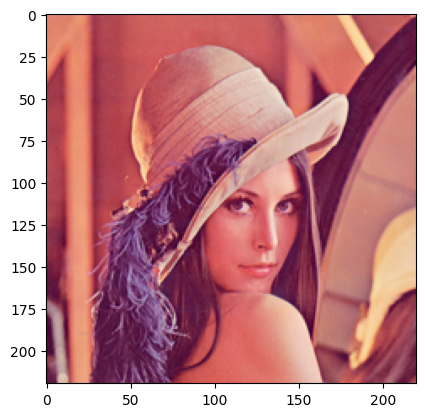

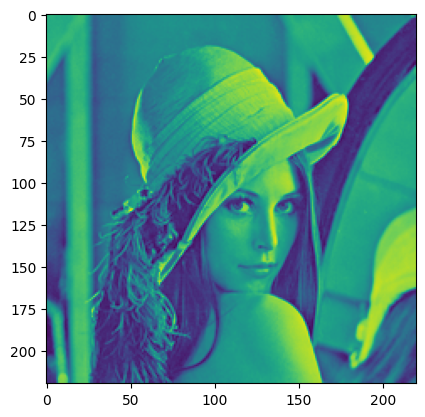

(220, 220)


In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 아래의 링크에서 레나 이미지 준비
# https://ko.wikipedia.org/wiki/%EB%A0%88%EB%82%98_(%EC%9D%B4%EB%AF%B8%EC%A7%80)

# 이미지를 colab 에 업로드
# 좌측 카테고리에 폴더 모양 클릭 후그래그를 통한 업로드

### 이미지 불러오기 (1 point)
#로컬에서 진행해서, 절대경로로 사용했습니다.
image_path ="C:/Users/lenovo/Desktop/2023_2/computerVision/Lenna.png"  
image =Image.open(image_path)


### 이미지 변환 (1 point)
# PIL.Image 를 np.array 로 변환
image =np.array(image)


### 이미지 시각화 (1 point)
print(image.shape)
plt.imshow(image)
plt.show()

### 'rgb2gray' 함수 정의 (5 points)
# 해당 함수는 RGB 이미지를 받아서 gray 이미지를 리턴
# G = 0.299 * R + 0.587 * G + 0.114 * B
#  https://blog.ggaman.com/965 를 참조했습니다
"""
YCrCb
Y = Red * 0.2126 + Geeen * 0.7152 + Blue * 0.0722

YPrPb
Y = Red * 0.299 + Green * 0.587  + Blue * 0.114
위에 함수에서는 YPrPb를 사용한것 같습니다.
"""


#https://stackoverflow.com/questions/41971663/use-numpy-to-convert-rgb-pixel-array-into-grayscale
"""ValueError                                Traceback (most recent call last)
~\AppData\Local\Temp\ipykernel_21972\293290506.py in <module>
     46 
     47 ### RGB를 gray 이미지로 변환 (1 point)
---> 48 image_gray =rgb2gray(image)
     49 
     50 

~\AppData\Local\Temp\ipykernel_21972\293290506.py in rgb2gray(image)
     41 
     42 def rgb2gray(image):
---> 43     image=np.dot(image,[0.299, 0.587, 0.114])
     44     return image
     45 

<__array_function__ internals> in dot(*args, **kwargs)

ValueError: shapes (220,220,4) and (3,) not aligned: 4 (dim 2) != 3 (dim 0)

220, 220, 3이 아니라 220, 220, 4라 곱이 안됨,
PNG에서 볼 수 있는 문제인데, a, 즉 알파값이 있어서이다.
RGB로 convert 해주면 될 것 같다.

"""
image =Image.open(image_path).convert('RGB')

def rgb2gray(image):
    image=np.dot(image,[0.299, 0.587, 0.114])
    return image


### RGB를 gray 이미지로 변환 (1 point)
image_gray =rgb2gray(image)


### gray 이미지 시각화 (1 point)
plt.imshow(image_gray)
plt.show()
print(image_gray.shape)


뭔가.. 흑백처럼 보이지는 않는다. 찾아보니   
https://todayisbetterthanyesterday.tistory.com/68  
'수치적으로 value가 높아질 수록 노란색 낮아질 수록 짙은 색으로 표현을 한 것이다.' 라고한다.  
YPrPb를 검색해보니 옛날에 썼었던 컴포지트? 케이블이 나온다.  

## 2. Convolution from scratch (10 points)

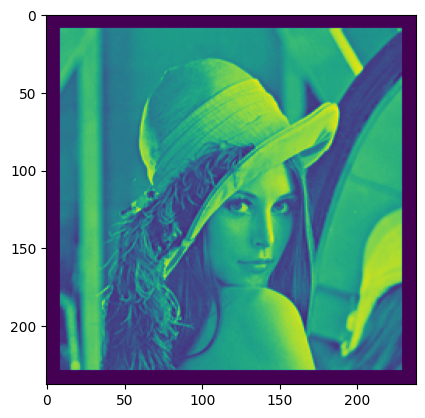

In [2]:
### identity 커널 정의 (1 point)
# 해당 커널을 필터링해도 이미지를 변화시키지 않음
kernel =np.array([[0, 0, 0],
                  [0, 1, 0],
                  [0, 0, 0]])
# Identity 커널은 합성곱 연산을 수행할 때 입력 이미지를 그대로 출력으로 전달하는 커널입니다


### 'conv2d' 함수 정의 (7 points)
# 해당 함수는 이미지와 커널을 입력으로 받음
# 'np.pad'를 활용하여 이미지 외부를 0으로 패딩(padding)할 수 있음
# 패딩 사이즈는 (사용하는 이미지에 컨벌루션이 동작할 수 있도록) 임의로 조절 가능
def conv2d(image, kernel, pad=10):
    # 이미지에 패딩 적용
    padded_image = np.pad(image, pad_width=pad, mode='constant', constant_values=0)
    #mode= constant 가 기본, constant_values 는 0 이 기본
    
    # 이미지와 커널의 크기
    image_height, image_width = padded_image.shape
    kernel_height, kernel_width = kernel.shape
    
    # 컨벌루션 결과를 저장할 배열 초기화
    output = np.zeros((image_height - kernel_height + 1, image_width - kernel_width + 1))
    
    # 슬라이딩 윈도우를 사용하여 커널을 적용
    for i in range(image_height - kernel_height + 1):
        for j in range(image_width - kernel_width + 1):
            patch = padded_image[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(patch * kernel)
    
    return output

### 이미지에 컨벌루션 적용(1 point)
image_conv =conv2d(image_gray,kernel)


### 컨벌루션 결과 시각화 (1 point)
plt.imshow(image_conv)
plt.show()

## 3. Peak Signal-to-Noise Ratio (PSNR) (6 points)

In [3]:
from math import log10, sqrt

### 'PSNR' 함수 정의 (6 points)
# 해당 함수는 원본 이미지와 필터링된 이미지를 받아 두 이미지의 quality 를 비교함
# 함수 구현은 다음의 웹페이지 참조
# https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio
"""
mean squared error (MSE)
Here, MAXI is the maximum possible pixel value of the image
즉 255가 될것이다.
"""
def PSNR(original, filtered,maxI=255):
    squared_error = (original - filtered) ** 2
    mse = np.mean(squared_error)
    psnr=20*log10((maxI)/sqrt(mse))
    return psnr

## 4. Average filter (8 points)

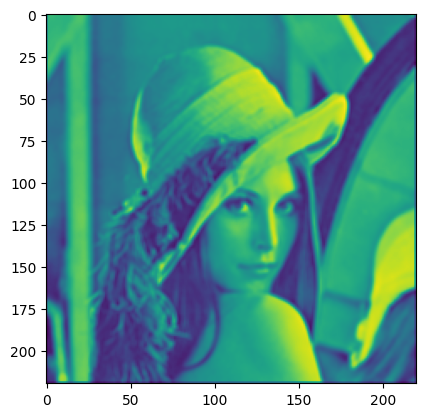

27.74893531525411


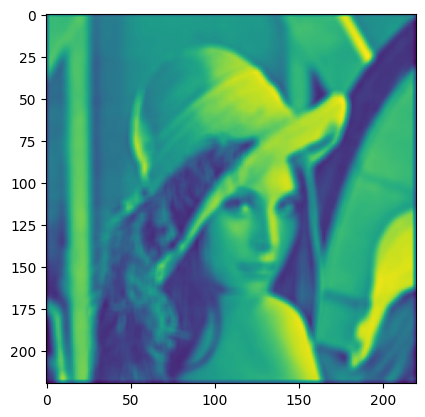

24.376297081201074


In [4]:
### 3 by 3 평균 블러 커널 정의 (1 point)
kernel_avg =np.array([[1/9, 1/9, 1/9],
                      [1/9, 1/9, 1/9],
                      [1/9, 1/9, 1/9]])


### 불러온 이미지에 커널 적용 (1 point)
image_conv =conv2d(image_gray,kernel_avg,pad=1)


### 컨벌루션 결과 시각화 (1 point)
plt.imshow(image_conv)
plt.show()

### PSNR 계산 (1 point)
# 원본 이미지와, 컨벌루션 된 이미지 활용
psnr =PSNR(image_gray,image_conv)
print(psnr)


### 5 by 5 평균 블러 커널 정의 (1 point)
kernel_avg =np.array([[1/25, 1/25, 1/25, 1/25, 1/25],
                      [1/25, 1/25, 1/25, 1/25, 1/25],
                      [1/25, 1/25, 1/25, 1/25, 1/25],
                      [1/25, 1/25, 1/25, 1/25, 1/25],
                      [1/25, 1/25, 1/25, 1/25, 1/25]])


### 불러온 이미지에 커널 적용 (1 point)
image_conv =conv2d(image_gray,kernel_avg,pad=2)


### 컨벌루션 결과 시각화 (1 point)
plt.imshow(image_conv)
plt.show()


### PSNR 계산 (1 point)
psnr =PSNR(image_gray,image_conv)
print(psnr)

## 5. Noise reduction (10 points)

In [5]:
from random import random

### 'salt_and_pepper' 함수 정의 (4 points)
# 해당 한수는 랜덤하게 노이즈를 발생시킴
# 특정한 픽셀 값은 겁정(0)으로 만들고, 또 다른 특정 픽셀에 대해서는 흰색(255)으로 변환
def salt_and_pepper(image):
    noisy_image = np.copy(image)
    total_pixels = image.shape[0] * image.shape[1]
    num_salt = int(total_pixels * 0.05)
    salt_coords = [np.random.randint(0, high=image.shape[0], size=num_salt),
                   np.random.randint(0, high=image.shape[1], size=num_salt)]
    noisy_image[tuple(salt_coords)] = 255
    num_pepper = int(total_pixels * 0.05)
    pepper_coords = [np.random.randint(0, high=image.shape[0], size=num_pepper),
                     np.random.randint(0, high=image.shape[1], size=num_pepper)]
    noisy_image[tuple(pepper_coords)] = 0
    output=noisy_image
    return output

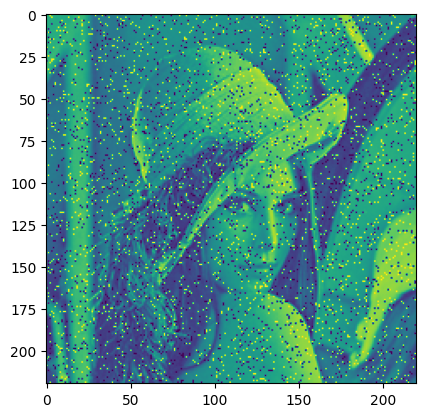

15.701757465965482


In [6]:
### 이미지에 salt_and_pepper 함수 적용(1 point)
image_noise =salt_and_pepper(image_gray)


### 컨벌루션 결과 시각화 (1 point)
plt.imshow(image_noise)
plt.show()
### PSNR 계산 (1 point)
psnr =PSNR(image_gray,image_noise)
print(psnr)

c:\Users\lenovo\anaconda\envs\inu\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == "":
c:\Users\lenovo\anaconda\envs\inu\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


라는 경고메세지가 뜬다.
tuple을 권장한다고 하니 코드를 수정해주면,  
안뜬다!

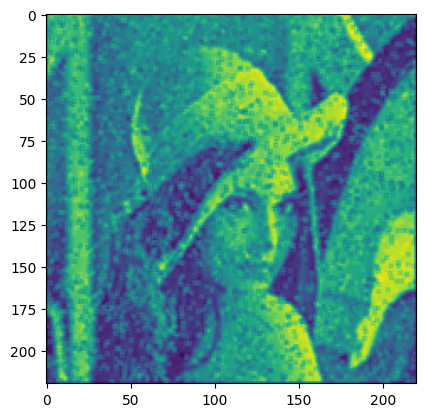

22.91525010545155


In [7]:
### 3 by 3 평균 블러 커널 활용하여 denoise 수행 (1 point)
kernel_avg =np.array([[1/9, 1/9, 1/9],
                      [1/9, 1/9, 1/9],
                      [1/9, 1/9, 1/9]])

image_denoise =conv2d(image_noise,kernel_avg,pad=1)


### 컨벌루션 결과 시각화 (1 point)
plt.imshow(image_denoise)
plt.show()

### PSNR 계산 (1 point)
psnr =PSNR(image_gray,image_denoise)
print(psnr)

## 6. Sobel operator (6 points)

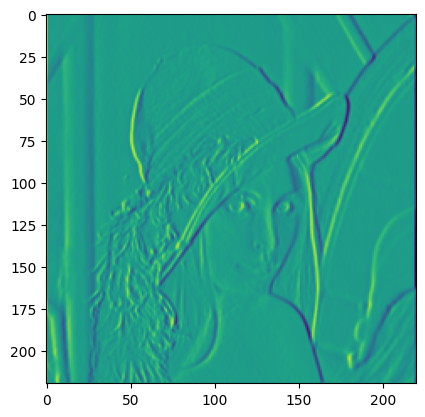

In [8]:
### x 방향으로 3 by 3 sobel 연산자 정의 (1 point)
kernel_x = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

### 이미지에 컨벌루션 적용(1 point)
image_conv =conv2d(image_gray,kernel_x,pad=1)


### 컨벌루션 결과 시각화 (1 point)
plt.imshow(image_conv)
plt.show()

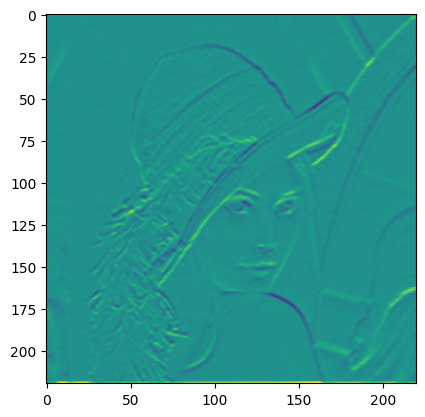

In [9]:
### y 방향으로 3 by 3 sobel 연산자 정의 (1 point)
kernel_y = np.array([[1, 2, 1],
                     [0, 0, 0],
                     [-1, -2, -1]])


### 이미지에 컨벌루션 적용(1 point)
image_conv =conv2d(image_gray,kernel_y,pad=1)


### 컨벌루션 결과 시각화 (1 point)
plt.imshow(image_conv)
plt.show()